The RT60 is 82 ms
(2, 161925)
(257, 632, 2)


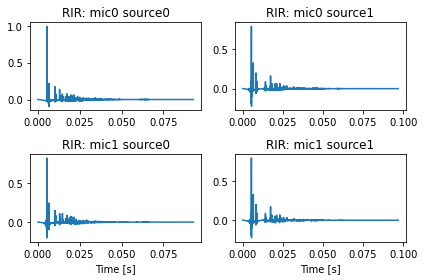

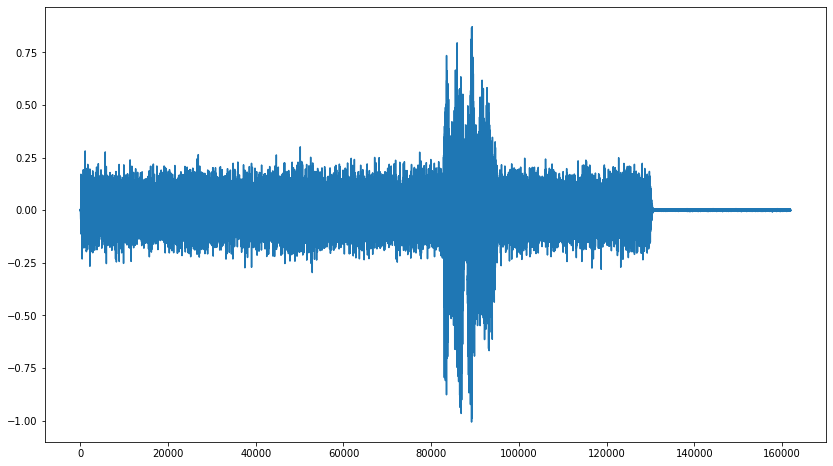

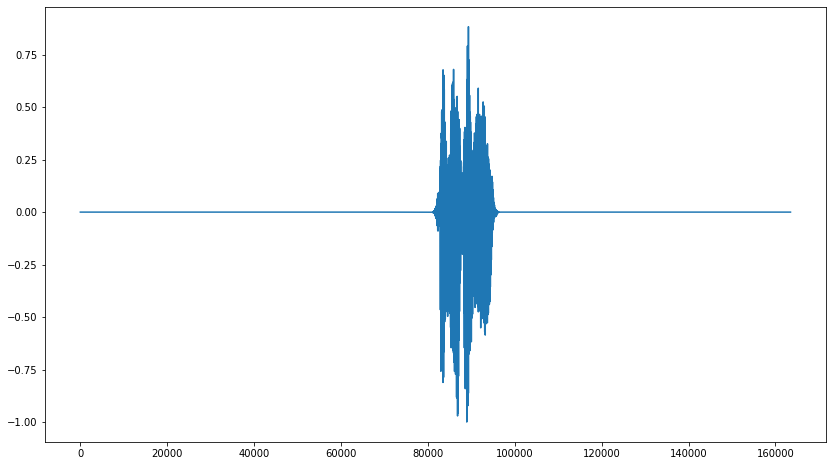

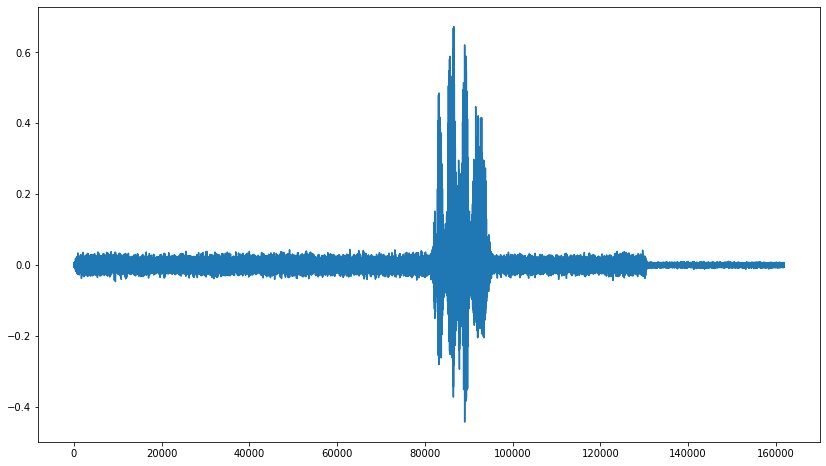

In [1]:
import numpy as np
import librosa
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from DistantSpeech.transform.transform import Transform
from DistantSpeech.beamformer.utils import pmesh, mesh, load_wav, save_audio, load_pcm, visual, pt
from DistantSpeech.beamformer.utils import load_audio as audioread
from DistantSpeech.beamformer.utils import save_audio as audiowrite
from DistantSpeech.beamformer.MicArray import MicArray, ArraySim
from DistantSpeech.beamformer.beamformer import beamformer
from DistantSpeech.beamformer.MicArray import MicArray, compute_tau
from DistantSpeech.noise_estimation.mcspp import McSpp
from DistantSpeech.kws.dual_mic_kws import DualMicKws
wavpath = '/home/wangwei/work/Beamforming-for-speech-enhancement-master/sample_data'
array_data, _ = load_wav(wavpath)

mic_angle_vector = [0,60,120,180,240,300]
sampling_frequency = 16000
fft_length = 512
fft_shift = 256
mic_diameter = 0.064
sound_speed = 343
look_direction = 30

signal = audioread("/home/wangwei/work/DistantSpeech/samples/kws_samples/xiaolan_long.wav")
# noise = audioread("/home/wangwei/work/DistantSpeech/samples/audio_samples/cleanspeech_aishell3_2.wav")
noise = audioread("/home/wangwei/work/DistantSpeech/samples/noise/office1.wav")
fs = 16000
M = 2
mic_array = MicArray(arrayType="linear", r=mic_diameter/2, M=M, n_fft=fft_length)
mic_array_sim = mic_array.array_sim
# print(mic_array_sim.R)
array_data, premix = mic_array_sim.generate_audio(signal, interference=noise, source_angle=look_direction, interf_angle=270, sir=0, snr=30, source_distance=1.0, interf_distance=1.0)
audiowrite('mix_kws.wav', np.transpose(array_data))
# audiowrite('signal.wav', np.transpose(premix[0, :, :]))
# audiowrite('interf.wav', np.transpose(premix[1, :, :]))
print(array_data.shape)
M = array_data.shape[0]
transform = Transform(n_fft=512, hop_length=256, channel=M)
D = transform.stft(np.transpose(array_data))
half_bin = D.shape[0]
frame_num = D.shape[1]
print(D.shape)

pt(array_data[0])
pt(premix[0,0])
pt(array_data[0]-array_data[1])

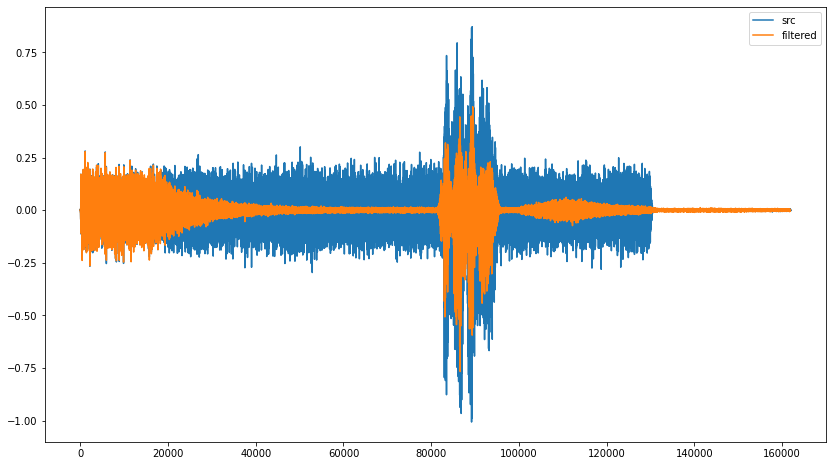

In [2]:
frameLen = 1024
hop = frameLen / 2
overlap = frameLen - hop
nfft = 256
c = 340
r = 0.032
fs = 16000

fdgsc = DualMicKws(mic_array, frameLen, hop, nfft, c, fs)

yout = fdgsc.process(array_data)

plt.figure(figsize=(14,8))
plt.plot(array_data[0])
plt.plot(yout)
plt.legend(['src', 'filtered'])
plt.show()
# pt(yout)
audiowrite('clean_kws.wav', yout/np.max(np.abs(yout)))
